## Winds towards NE by Month (1972-2018)

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

wind = pd.read_csv('Bham_airport_wind.csv') # load wind data (from B'ham Intl Airport)

#### Data pre-processing

In [2]:
Date_time = pd.to_datetime(wind.time2)  # convert to datetime format
wind.insert(4, 'Date_time', Date_time, allow_duplicates = False) # add datetime data to dataframe
del wind['time'] # remove unnecessary columns from data frame
del wind['time2']

In [3]:
Year = wind.Date_time.dt.year # create seperate variables for year and month from timestamp data
Month = wind.Date_time.dt.month
wind.insert(3, 'Year', Year, allow_duplicates = False) # add year/month variables to dataframe
wind.insert(4, 'Month', Month, allow_duplicates = False)

#### Analysis

In [4]:
sig_wind = wind[wind.spd > 5] # select all winds above 5 m/s
NE_wind = sig_wind[sig_wind.wnddir.between(0,70)] # select all winds blowing from the NE - E (0 - 70 deg)

In [5]:
# Sum NE wind speeds for each month 

Month_sum = np.arange(start=1, stop=14)

for i in range (1, 13):
    Month_sum[i] = NE_wind.loc[NE_wind.Month == i, 'spd'].sum()
    
Month_sum = np.delete(Month_sum, 0)

In [6]:
# Average NE wind speeds for each month 

Month_mean = np.arange(start=1, stop=14)
    
for i in range(1, 13):
    Month_mean[i] = (NE_wind.loc[NE_wind.Month == i, 'spd']).mean()
    
Month_mean = np.delete(Month_mean, 0)

In [7]:
Num_meas = NE_wind.groupby('Month').size() # count number of measured NE winds per month

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] # create array of month names

list_of_tuples = list(zip(Month, Month_sum, Month_mean, Num_meas)) 
Month_sum = pd.DataFrame(list_of_tuples, 
                  columns = ['Month', 'Sum_spd', 'Mean_spd', 'Wind_count']) # combine sum, mean, and count into single array

Month_sum

,Month,Sum_spd,Mean_spd,Wind_count
0,Jan,101486,10,9761
1,Feb,90703,11,7921
2,Mar,53142,10,5092
3,Apr,21592,8,2425
4,May,9200,8,1146
5,Jun,5286,7,694
6,Jul,3431,7,445
7,Aug,5429,8,664
8,Sept,14370,8,1603
9,Oct,31368,9,3436


[Text(0.5, 15.0, 'Month')]

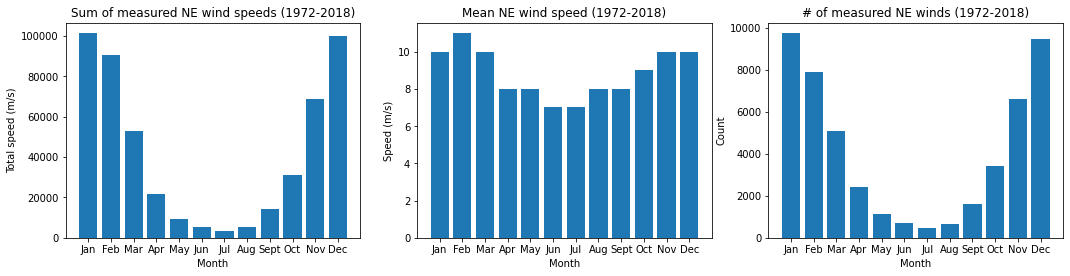

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.tight_layout(pad = 2.6, rect=[0, 0, 2.5, 1])

ax1.bar(Month_sum.Month, Month_sum.Sum_spd)
ax2.bar(Month_sum.Month, Month_sum.Mean_spd)
ax3.bar(Month_sum.Month, Month_sum.Wind_count)

ax1.title.set_text('Sum of measured NE wind speeds (1972-2018)')
ax2.title.set_text('Mean NE wind speed (1972-2018)')
ax3.title.set_text('# of measured NE winds (1972-2018)')

ax1.set(ylabel = 'Total speed (m/s)')
ax2.set(ylabel = 'Speed (m/s)')
ax3.set(ylabel = 'Count')

ax1.set(xlabel = 'Month')
ax2.set(xlabel = 'Month')
ax3.set(xlabel = 'Month')

In [9]:
from windrose import WindroseAxes

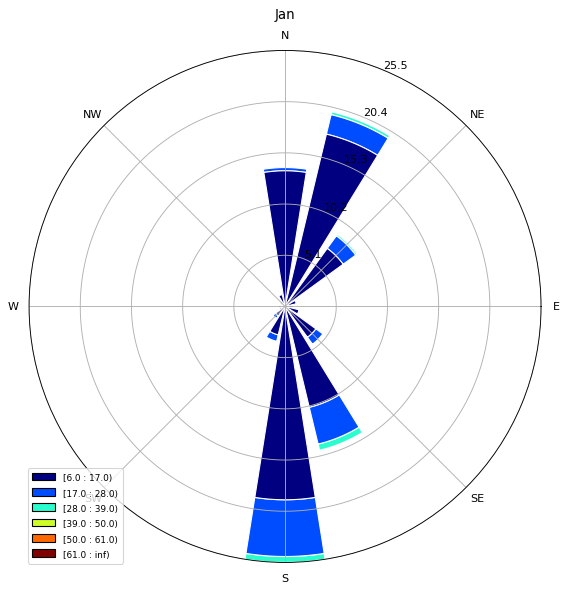

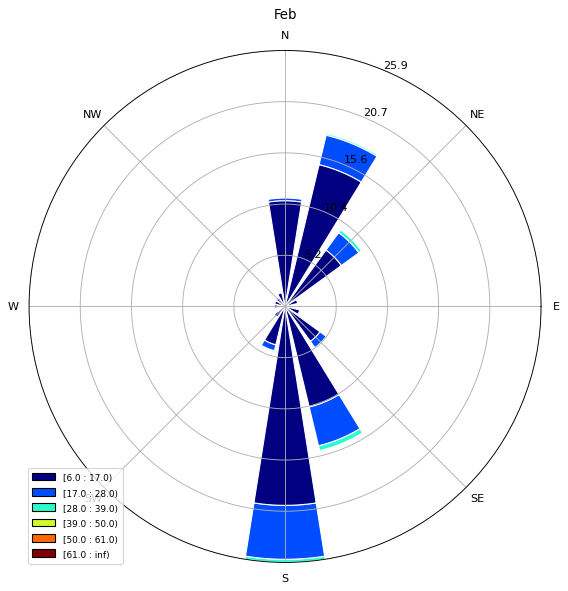

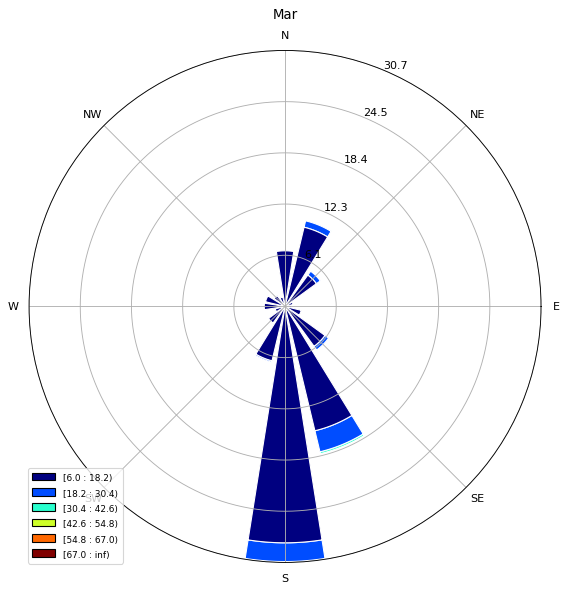

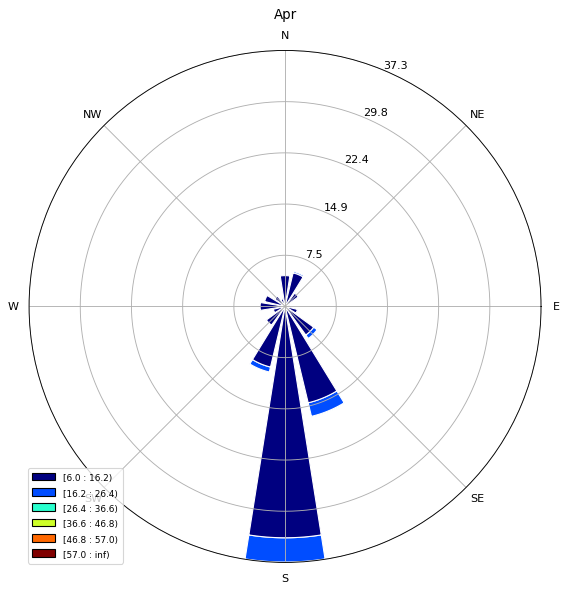

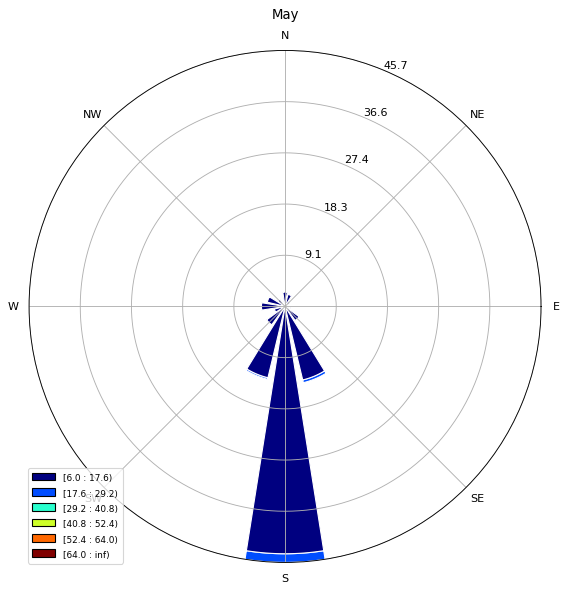

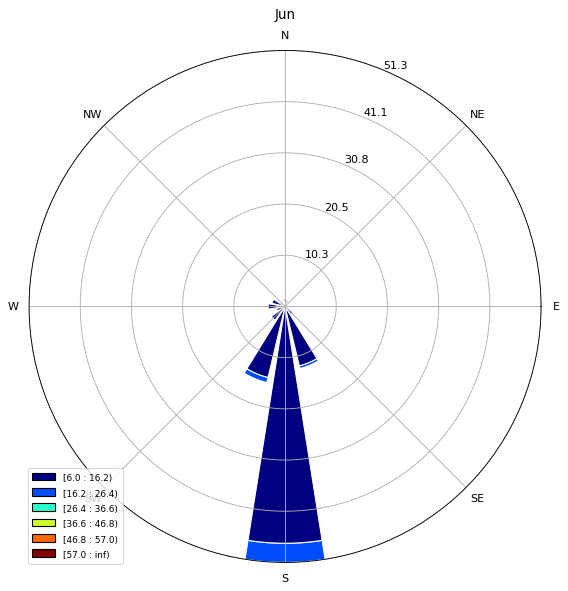

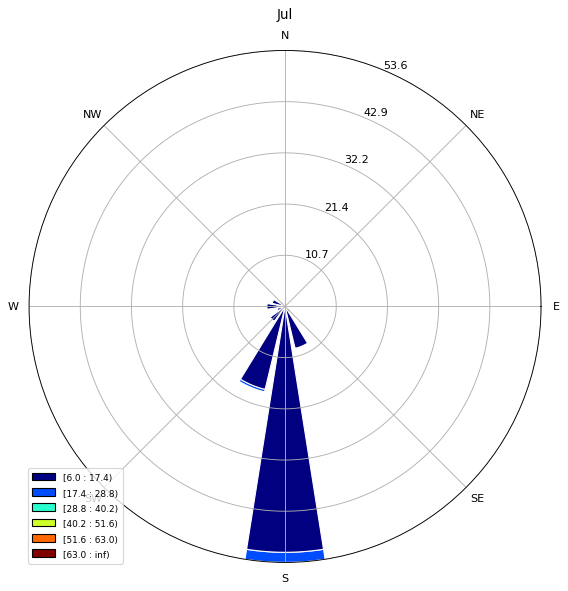

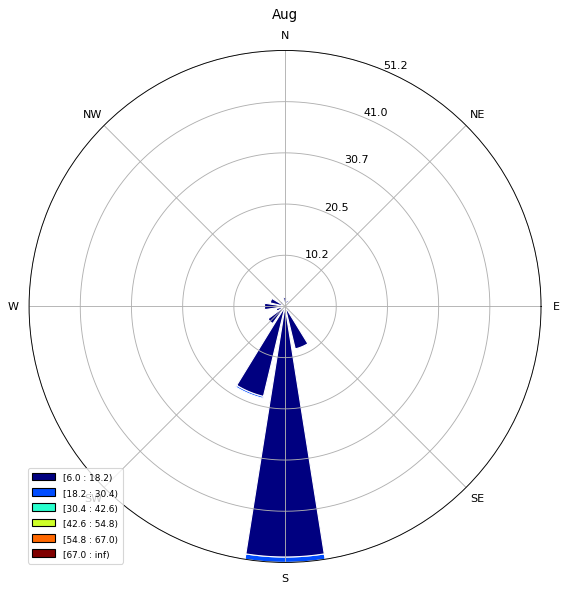

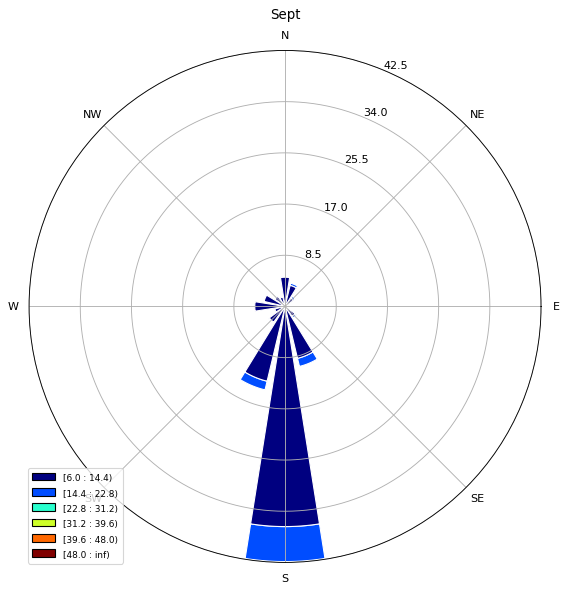

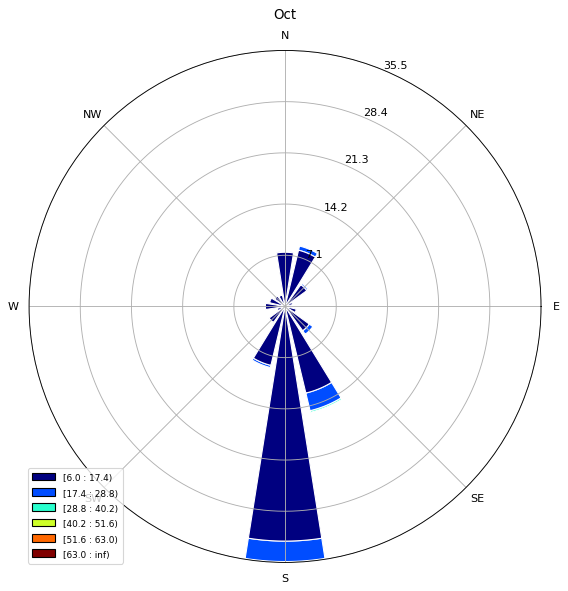

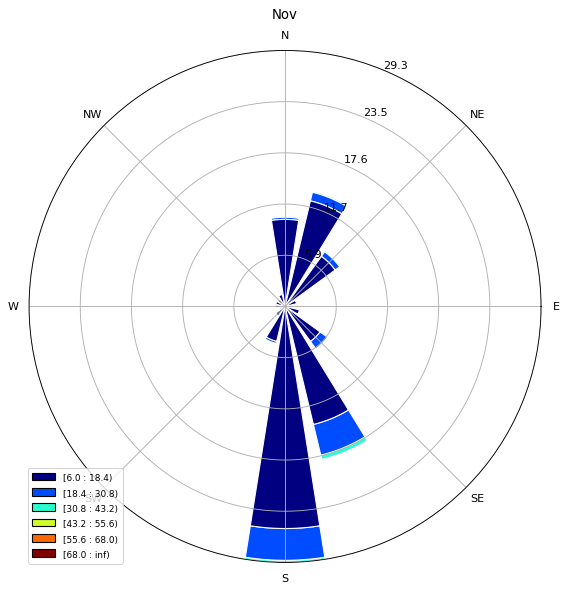

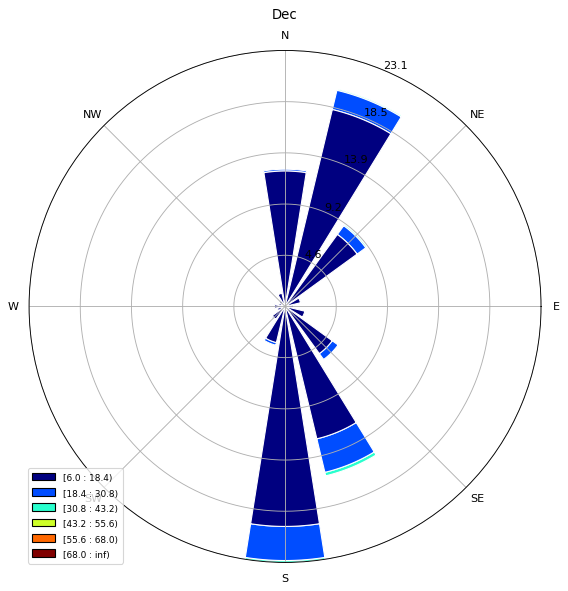

In [10]:
for i in range(1, 13):
    ax = WindroseAxes.from_ax()
    ax.bar(sig_wind[sig_wind.Month == i].wnddir, sig_wind[sig_wind.Month == i].spd, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title(Month[i-1])
    ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE'])
    